In [3]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter

# libraries
import sys
sys.path.append("../../models")
from functions import import_country

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['../fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'

colors = ["#6CC2BD",  "#6CC2BD", "#F16E87", "#65A1A0", "#EBC26C"]

import warnings
warnings.filterwarnings("ignore")

alpha_s = [10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**(2), 10**(3)]
gamma_s = [10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1)]

countries = ["Egypt", "Serbia", "Canada",
             "Peru", "Ukraine", "Italy"]
rs  = [1.3, 1.5]
VE  = 0.9
rVs = [0.25 / 100, 1.0 / 100]
vaccination_strategy = "old_first"
models = ["constant_rate", "vaccine_rate"]

# color map
cmap = ListedColormap([to_rgba(colors[0], alpha=0.2),
                       to_rgba(colors[0], alpha=0.4),
                       to_rgba(colors[0], alpha=0.6),
                       to_rgba(colors[0], alpha=0.7),
                       to_rgba(colors[0], alpha=0.8),
                       to_rgba(colors[0], alpha=0.9),
                       to_rgba(colors[0], alpha=1.0)])

interpolation = "gaussian"
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

Plot:

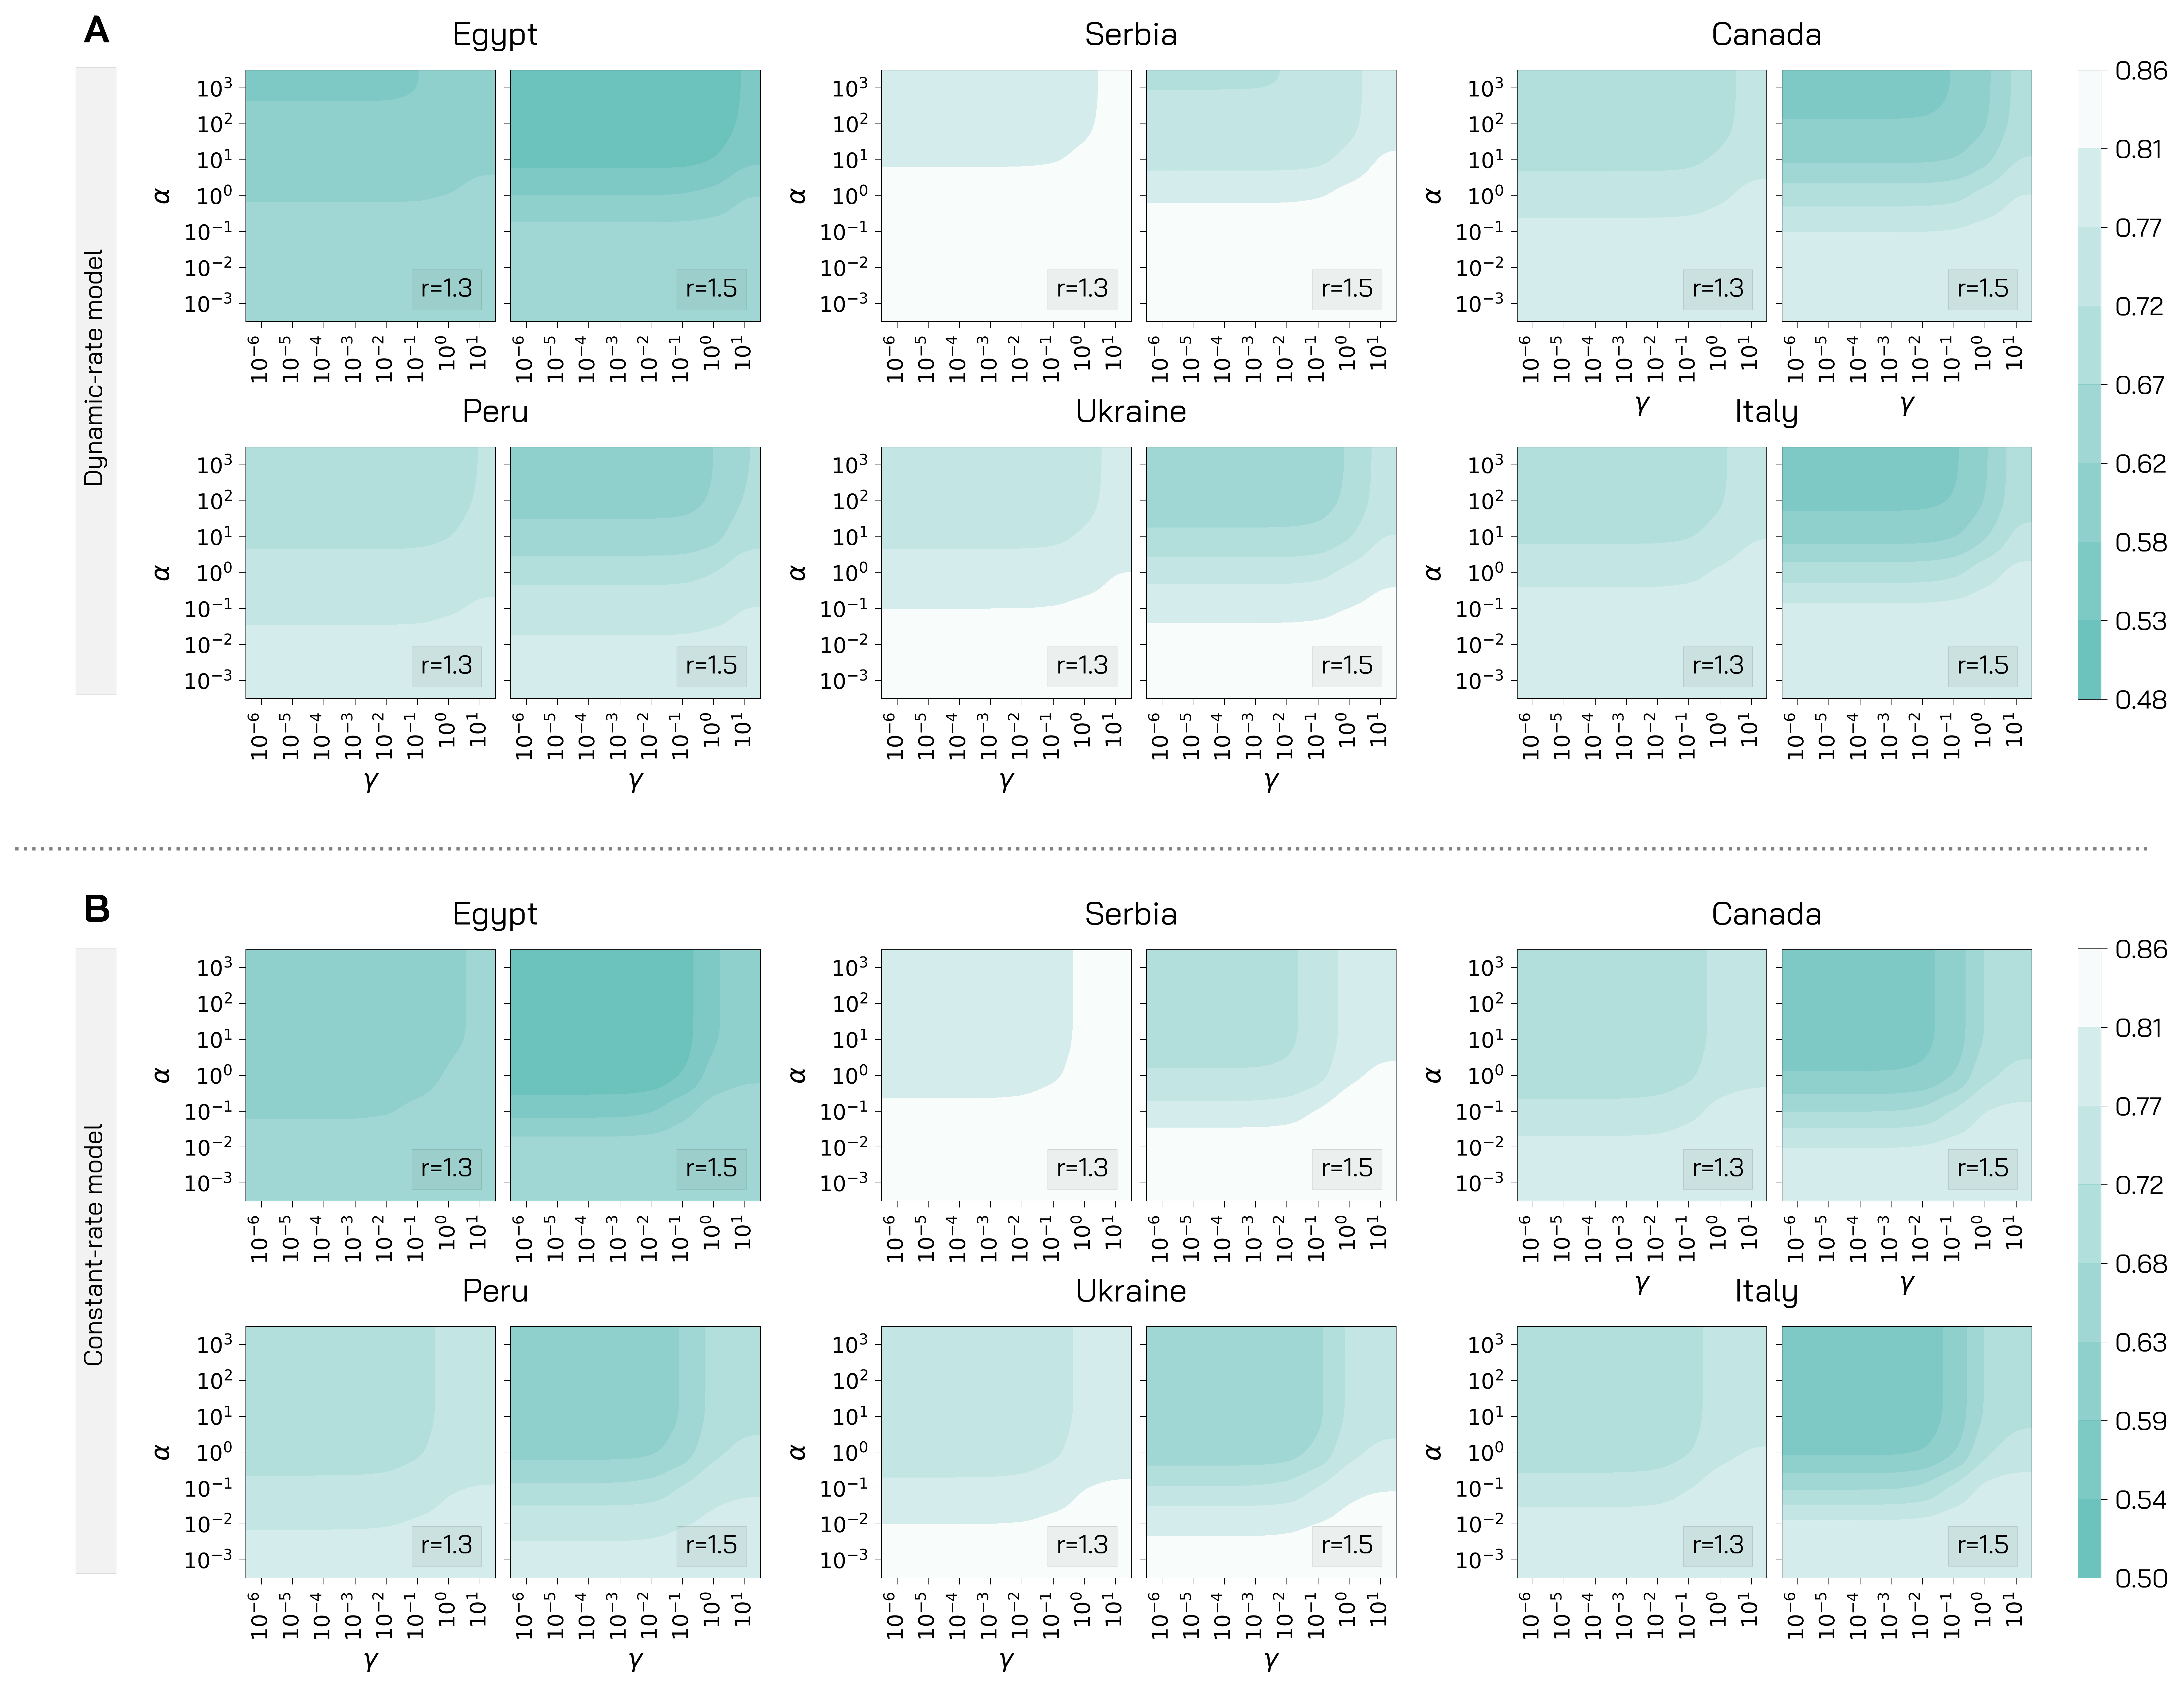

In [4]:
nlevels = 9
c=0
cmap_colors = [to_rgba(colors[c], alpha=a) for a in np.linspace(0.05, 1, nlevels)]
cmap_colors.reverse()
cmap = ListedColormap(cmap_colors)

# import data
with open("../../output/phase_space.pkl", "rb") as file: 
    data = pkl.load(file)                                                   

# create axes list
fig = plt.figure(figsize=(15., 13.), dpi=500)

num_rows, num_cols       = 4, 6
row_height, space_height = 3, 1
col_width,  space_width  = 5, 2

num_sep_rows = lambda x: int((x - 1) / 2)
num_sep_cols = lambda x: int((x - 1) / 2)

grid = (row_height * num_rows + space_height * num_sep_rows(num_rows), 
        col_width * num_cols + space_width * num_sep_cols(num_cols))
ax_list = []
for ind_row in range(num_rows):
    for ind_col in range(num_cols):
        grid_row = row_height * ind_row + space_height * num_sep_rows(ind_row + 1)
        grid_col = col_width * ind_col + space_width * num_sep_cols(ind_col + 1)
        ax_list += [plt.subplot2grid(grid, (grid_row, grid_col), rowspan=row_height, 
                                     colspan=col_width)]  
plt.subplots_adjust(hspace=2000, wspace=0.4)

# get vmin and vmax 
rV = 1.0 / 100
vmax_vaccine, vmin_vaccine   = 0, 100
vmax_constant, vmin_constant = 0, 100
for country in countries:
    for r in rs:
        if data[country][rV][r]["vaccine_rate"].max() > vmax_vaccine: 
            vmax_vaccine = data[country][rV][r]["vaccine_rate"].max()
        if data[country][rV][r]["vaccine_rate"].min() < vmin_vaccine:
            vmin_vaccine = data[country][rV][r]["vaccine_rate"].min()
            
        if data[country][rV][r]["constant_rate"].max() > vmax_constant: 
            vmax_constant = data[country][rV][r]["constant_rate"].max()
        if data[country][rV][r]["constant_rate"].min() < vmin_constant:
            vmin_constant = data[country][rV][r]["constant_rate"].min()  
boundaries_vaccine  = np.linspace(vmin_vaccine, vmax_vaccine, nlevels)
boundaries_constant = np.linspace(vmin_constant, vmax_constant, nlevels)
norm_vaccine        = BoundaryNorm(boundaries_vaccine, cmap.N, clip=True)
norm_constant       = BoundaryNorm(boundaries_constant, cmap.N, clip=True)

i = 0
for country in countries:
    ax_list[i].set_title(country, y=1.05, x=1, fontsize=15)
    im_vaccine = ax_list[i].imshow(data[country][rV][1.3]["vaccine_rate"], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm_vaccine)
    ax_list[i+1].imshow(data[country][rV][1.5]["vaccine_rate"], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm_vaccine)
    
    ax_list[i].set_xticks(range(len(gamma_s)))
    ax_list[i].set_xticklabels(["$10^{-6}$", "$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$", "$10^{1}$"], rotation=90, fontsize=10)
    ax_list[i].set_yticks(range(len(alpha_s)))
    ax_list[i].set_yticklabels(["$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], fontsize=10)
    ax_list[i].set_ylabel("$\\alpha$", fontsize=12)
    if country in ["Ukraine", "Canada", "Peru"]:
        ax_list[i].set_xlabel("$\\gamma$", fontsize=12)
        ax_list[i+1].set_xlabel("$\\gamma$", fontsize=12)

    ax_list[i+1].set_xticks(range(len(gamma_s)))
    ax_list[i+1].set_xticklabels(["$10^{-6}$", "$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$", "$10^{1}$"], rotation=90, fontsize=10)
    ax_list[i+1].set_yticks(range(len(alpha_s)))
    ax_list[i+1].set_yticklabels(["","","","","","",""], fontsize=10)
    
    ax_list[i].annotate("r=1.3", fontsize=12, bbox=props, xy=(0.7,0.1), xycoords='axes fraction')
    ax_list[i+1].annotate("r=1.5", fontsize=12, bbox=props, xy=(0.7,0.1), xycoords='axes fraction')

    i += 2
    
for country in countries:
    ax_list[i].set_title(country, y=1.05, x=1, fontsize=15)
    im_constant = ax_list[i].imshow(data[country][rV][1.3]["constant_rate"], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm_constant)
    ax_list[i+1].imshow(data[country][rV][1.5]["constant_rate"], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm_constant)
    
    ax_list[i].set_xticks(range(len(gamma_s)))
    ax_list[i].set_xticklabels(["$10^{-6}$", "$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$", "$10^{1}$"], rotation=90, fontsize=10)
    ax_list[i].set_yticks(range(len(alpha_s)))
    ax_list[i].set_yticklabels(["$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], fontsize=10)
    ax_list[i].set_ylabel("$\\alpha$", fontsize=12)
    if country in ["Ukraine", "Canada", "Peru"]:
        ax_list[i].set_xlabel("$\\gamma$", fontsize=12)
        ax_list[i+1].set_xlabel("$\\gamma$", fontsize=12)
        
    ax_list[i+1].set_xticks(range(len(gamma_s)))
    ax_list[i+1].set_xticklabels(["$10^{-6}$", "$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$", "$10^{1}$"], rotation=90, fontsize=10)
    ax_list[i+1].set_yticks(range(len(alpha_s)))
    ax_list[i+1].set_yticklabels(["","","","","","",""], fontsize=10)
    
    ax_list[i].annotate("r=1.3", fontsize=12, bbox=props, xy=(0.7,0.1), xycoords='axes fraction')
    ax_list[i+1].annotate("r=1.5", fontsize=12, bbox=props, xy=(0.7,0.1), xycoords='axes fraction')
    
    i += 2
    
    
fig.add_artist(lines.Line2D([0.025, 0.95], [0.49, 0.49], linestyle="dotted", color="gray"))
ax_list[12].annotate("                              Constant-rate model                         ", xy=(-0.6,-1.45), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')
ax_list[0].annotate("                              Dynamic-rate model                          ", xy=(-0.6,-1.45), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')

ax_list[0].annotate("A", xy=(-0.65, 1.15), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")
ax_list[12].annotate("B", xy=(-0.65, 1.15), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")

cbar_constant_ax = fig.add_axes([0.92, 0.565, 0.01, 0.315])
cbar_constant = plt.colorbar(im_constant, cax=cbar_constant_ax)
cbar_constant.ax.tick_params(labelsize=12) 
cbar_constant.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

cbar_vaccine_ax = fig.add_axes([0.92, 0.125, 0.01, 0.315])
cbar_vaccine = plt.colorbar(im_vaccine, cax=cbar_vaccine_ax)
cbar_vaccine.ax.tick_params(labelsize=12) 
cbar_vaccine.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig("./SM_img/phase_space.pdf", bbox_inches="tight")